### IMPORT

In [13]:
import pandas as pd
import json
  

df = pd.read_feather('Data/map5')

### Extracting first value from classification list

In [8]:
df['new_class'] = df['spray mode'].apply(lambda x: str(x[0]))
df = df.drop('spray mode', axis=1).rename(columns={'new_class': 'spray_mode'})
df.head()

,index,name,data [nA],flow rate [m3/s],voltage,current PS,temperature,humidity,date and time,target voltage,mean,variance,deviation,median,rms,spray_mode
0,sample 0,setup/liquid/ethanol,"[-64.90565490722656, -72.70440673828125, -71.4...",0.1,4501.74,-1.675510e-08,0,0,Fri_10 Feb 2023,4500,-22.780567,261.774475,16.179445,-18.364780,27.941526,Undefined
1,sample 1,setup/liquid/ethanol,"[-3.773584842681884, -2.01257848739624, -5.786...",0.1,4501.74,-1.675510e-08,19.40\r\n,0,Fri_10 Feb 2023,4500,-0.710118,23.613165,4.859338,-0.503145,4.910950,Undefined
2,sample 2,setup/liquid/ethanol,"[0.7547169923782341, -3.522012710571289, 0.754...",0.1,4501.74,-1.675510e-08,19.40\r\n,38,Fri_10 Feb 2023,4500,-0.401273,23.839987,4.882621,0.000000,4.899082,Undefined
3,sample 3,setup/liquid/ethanol,"[-3.773584842681884, 0.25157231092453003, 1.50...",0.1,4501.74,-1.675510e-08,19.40\r\n,38,Fri_10 Feb 2023,4500,-0.173640,23.772942,4.875751,0.251572,4.878841,Undefined
4,sample 4,setup/liquid/ethanol,"[-3.2704403400421143, -5.534591197967529, -6.2...",0.1,4501.74,-1.675510e-08,19.40\r\n,38,Fri_10 Feb 2023,4500,-0.185917,23.495802,4.847247,0.251572,4.850811,Undefined


In [16]:
sample = df['spray_mode'][0]

In [22]:
df = df.loc[df['spray_mode'] == 'Undefined']

df.info()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3880 entries, 0 to 3879
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             3880 non-null   object 
 1   name              3880 non-null   object 
 2   data [nA]         3880 non-null   object 
 3   flow rate [m3/s]  3880 non-null   float64
 4   voltage           3880 non-null   float64
 5   current PS        3880 non-null   float64
 6   temperature       3880 non-null   object 
 7   humidity          3880 non-null   int64  
 8   date and time     3880 non-null   object 
 9   target voltage    3880 non-null   int64  
 10  mean              3880 non-null   float64
 11  variance          3880 non-null   float64
 12  deviation         3880 non-null   float64
 13  median            3880 non-null   float64
 14  rms               3880 non-null   float64
 15  spray_mode        3880 non-null   object 
dtypes: float64(8), int64(2), object(6)
memory 

### MAPA

In [2]:
'''
	Analysis of mapping V x FR experiments
	AUTHOR: 乔昂 - jueta
	DATE: 19/01/2023
'''

import pandas as pd
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt
from sklearn.utils import column_or_1d
import numpy as np
from scipy.signal import butter, lfilter



In [5]:


df['flow_rate'] = df['flow_rate'].astype(float)
plt.scatter(df['flow_rate'], df['target_voltage'], color=df['colormap'])
plt.ylabel('Voltage [V]')
plt.xlabel('Flow Rate [uL/min]')
plt.title("colors = {'Cone Jet':'red', 'Dripping':'green', 'Intermittent':'blue', 'Multi Jet':'purple', 'Undefined':'black', 'Corona':'cyan'}")
plt.show()


NameError: name 'plt' is not defined

### FFT  -> Trying to get something from FFT

In [98]:
import numpy as np

sample = df['current'][600]
classification = df['spray_mode'][600]
sample_rate = 1e5
n = sample.size

fourier = np.fft.rfft(sample)
frequencies = np.fft.rfftfreq(n, d=1./sample_rate)

Positions and magnitude of frequency peaks:
49.9990    	 1.9622
99.9980    	 0.8075
149.9970    	 0.5064
199.9960    	 0.2456
249.9950    	 0.2532
399.9920    	 0.2025
21561.5688    	 0.4305
-21561.5688    	 0.4305
-399.9920    	 0.2025
-249.9950    	 0.2532
-199.9960    	 0.2456
-149.9970    	 0.5064
-99.9980    	 0.8075
-49.9990    	 1.9622
classification:  Cone Jet


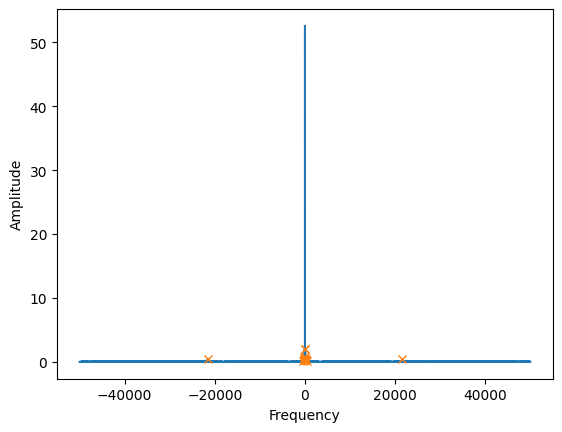

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks

# Number of samplepoints
N = sample.size
# sample spacing
T = 1.0 / sample_rate
x = np.linspace(0.0, N*T, N)
yf = fft(sample, norm='forward')
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
peaks_index, properties = find_peaks(np.abs(yf), height=0.2)

dt=x[1]-x[0]  # time step of the data
freq = fftfreq(n, d=dt)

# Notes: 
# 1) peaks_index does not contain the frequency values but indices
# 2) In this case, properties will contain only one property: 'peak_heights'
#    for each element in peaks_index (See help(find_peaks) )

# Let's first output the result to the terminal window:
print('Positions and magnitude of frequency peaks:')
[print("%4.4f    \t %3.4f" %(freq[peaks_index[i]], properties['peak_heights'][i])) for i in range(len(peaks_index))]


# Figure-2: The frequencies

plt.plot(freq, np.abs(yf),'-', freq[peaks_index],properties['peak_heights'],'x')
print("classification: ", classification)
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()


# fig, ax = plt.subplots()
# ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
# plt.show()